In [1]:
import numpy as np
import scipy as sp
import math
import Universality_check as Uc
import Gate_helper
import Swap_generators

### Gate Set (S)

In [2]:
## Fermionic puzzle
Perms_f = Swap_generators.swaps(-1,-1)
SQRT_SWAP_f = Swap_generators.sqrt_swaps(-1,-1)
Quarter_Swap_f = Swap_generators.general_swaps(-1,-1,theta=np.pi/4)
S_f = SQRT_SWAP_f

## Bosonic puzzle
Perms_b = Swap_generators.swaps(1,1)
SQRT_SWAP_b = Swap_generators.sqrt_swaps(1,1)
Quarter_Swap_b = Swap_generators.general_swaps(1,1,theta=np.pi/4)
S_b = SQRT_SWAP_b

## Mixed puzzle
Perms_m = Swap_generators.swaps(-1,1)# we add diagonal swaps here to get universality.
SQRT_SWAP_m = Swap_generators.sqrt_swaps(-1,1)
Quarter_Swap_m = Swap_generators.general_swaps(-1,1,theta=np.pi/4)
S_m = SQRT_SWAP_m

## Step 1 of the algorithm,

For our gate set to be universal we need the center of our group to be the trivial center which is just scalar multiples of the identity. If there is a non identity element in the center than that element will commute with everything in our gate set and can thus not be synthesised by a sequence of gates. If the center is nontrivial than the groups may still be infinite but they cannot be universal.

In [3]:
print("Center is trivial for fermionic puzzle:",Uc.check_center(S_f))
print("Center is trivial for bosonic puzzle:",Uc.check_center(S_b))
print("Center is trivial for mixed puzzle:",Uc.check_center(S_m))

Center is trivial for fermionic puzzle: False
Center is trivial for bosonic puzzle: False
Center is trivial for mixed puzzle: False


### Step 2 of the algorithm

This code determines the span of our gate set is infinite or finite. It does this by attempting to find an element that can be reached from our gate set that is in a ball of appropriate radius that is not in the center of the group. Note that if this check passes, but the previous check fails, that the span of $S$ is infinite, but not all of $SU(6)$, meaning it is not universal.  

In [5]:
# using a much smaller value for N than is required to be thourough since i want this to actually run 
N_SU6 = 100  #36398100 # upper bound for N

print("Fermionic puzzle is infinite:",not Uc.check_finite(S_f,N_SU6,10,verbose=False))
print("Bosonic puzzle is infinite:",not Uc.check_finite(S_b,N_SU6,10,verbose=False))
print("Mixed puzzle is infinite:",not Uc.check_finite(S_m,N_SU6,10,verbose=False))

Fermionic puzzle is infinite: True
Bosonic puzzle is infinite: True
Mixed puzzle is infinite: True


## Or all together we can check for universality


In [6]:
print("Fermionic puzzle is univeral:",Uc.check_universal(S_f))
print("Bosonic puzzle is univeral:",Uc.check_universal(S_b))
print("Mixed puzzle is univeral:",Uc.check_universal(S_m))

Fermionic puzzle is univeral: False
Bosonic puzzle is univeral: False
Mixed puzzle is univeral: False


# Puzzle variants that achieve universality

## 1) Half Swaps with and an S gate

In [7]:
## add S_gate to fermionic gate set,
S_f1 = [G for G in SQRT_SWAP_f]
S_f1.append(Gate_helper.S_gate(6))

S_b1 = [G for G in SQRT_SWAP_b]
S_b1.append(Gate_helper.S_gate(6))

S_m1 = [G for G in SQRT_SWAP_m]
S_m1.append(Gate_helper.S_gate(6))

In [8]:
print("With S gate the fermionic puzzle is universal:",Uc.check_universal(S_f1))
print("With S gate the bosonic puzzle is universal:",Uc.check_universal(S_b1))
print("With S gate the mixed puzzle is universal:",Uc.check_universal(S_m1))

With S gate the fermionic puzzle is universal: True
With S gate the bosonic puzzle is universal: True
With S gate the mixed puzzle is universal: True


## 2) Add in Diagonal swaps so the puzzle allows all to all swaps

In [10]:
# TODO: Fix this error
Perms_f2 = [SN_f,SS_f,SE_f,SN_f,D1_f,D2_f]
SQRT_SWAP_f2 = [(Id + 1j*P)/np.sqrt(2) for P in Perms_f2]
S_f2 = SQRT_SWAP_f2

Perms_b2 = [SN_b,SS_b,SE_b,SN_b,D1_b,D2_b]
SQRT_SWAP_b2 = [(Id + 1j*P)/np.sqrt(2) for P in Perms_b2]
S_b2 = SQRT_SWAP_b2

Perms_m2 = [SN_m,SS_m,SE_m,SN_m,D1_m,D2_m]
SQRT_SWAP_m2 = [(Id + 1j*P)/np.sqrt(2) for P in Perms_m2]
S_m2 = SQRT_SWAP_m2

NameError: name 'SN_f' is not defined

In [16]:
print("With diagonal swaps the fermionic puzzle is universal:",Uc.check_universal(S_f2))
print("With diagonal swaps the bosonic puzzle is universal:",Uc.check_universal(S_b2))
print("With diagonal swaps the mixed puzzle is universal:",Uc.check_universal(S_m2))

With diagonal swaps the fermionic puzzle is universal: False
With diagonal swaps the bosonic puzzle is universal: False
With diagonal swaps the mixed puzzle is universal: True


### Quarter Swaps and Eight Swaps

In [11]:
S_f3 = Quarter_Swap_f
S_b3 = Quarter_Swap_b
S_m3 = Quarter_Swap_m

Eighth_Swap_f = Swap_generators.general_swaps(-1,-1,theta=np.pi/8)
Eighth_Swap_b = Swap_generators.general_swaps(1,1,theta=np.pi/8)
Eighth_Swap_m = Swap_generators.general_swaps(-1,1,theta=np.pi/8)

S_f4 = Eighth_Swap_f
S_b4 = Eighth_Swap_b
S_m4 = Eighth_Swap_m

In [12]:
print("With quarter swaps the fermionic puzzle is universal:",Uc.check_universal(S_f3))
print("With quarter swaps the bosonic puzzle is universal:",Uc.check_universal(S_b3))
print("With quarter swaps the mixed puzzle is universal:",Uc.check_universal(S_m3))
print('------------------------------------------------------')
print("With eighth swaps the fermionic puzzle is universal:",Uc.check_universal(S_f4))
print("With eighth swaps the bosonic puzzle is universal:",Uc.check_universal(S_b4))
print("With eighth swaps the mixed puzzle is universal:",Uc.check_universal(S_m4))

With quarter swaps the fermionic puzzle is universal: False
With quarter swaps the bosonic puzzle is universal: False
With quarter swaps the mixed puzzle is universal: False
------------------------------------------------------
With eighth swaps the fermionic puzzle is universal: False
With eighth swaps the bosonic puzzle is universal: False
With eighth swaps the mixed puzzle is universal: False


# Add in minimal addition

In [13]:
## add S_gate to fermionic gate set,
Fake_phase = np.diag([1,1,1,1,1,-1])


S_f1 = [G for G in SQRT_SWAP_f]
S_f1.append(Fake_phase)

S_b1 = [G for G in SQRT_SWAP_b]
S_b1.append(Fake_phase)

S_m1 = [G for G in SQRT_SWAP_m]
S_m1.append(Fake_phase)

In [14]:
print("Fermions with fake phase gate:",Uc.check_universal(S_f1))
print("Bosons with fake phase gate:",Uc.check_universal(S_b1))
print("Mixed puzzle with fake phast gate:",Uc.check_universal(S_m1))

Fermions with fake phase gate: True
Bosons with fake phase gate: True
Mixed puzzle with fake phast gate: True


In [12]:
def commutator(A,B):
    return A@B - B@A
def vec(A):
    vector = np.array(A[:,0])
    for i in range(len(A[0,:])-1):
        column = A[:,i+1]
        vector = np.append(vector,column)
    return np.transpose(vector)

In [13]:
#commutator(SQRT_SWAP_f[0],Fake_phase)


In [14]:
dim = 6
X = np.zeros((dim,dim),dtype=complex)
for i in range(dim):
    X[i,i-1] = 1
Z = Gate_helper.Z_gate(dim)
Y = 1j*X@Z
I = np.eye(dim)
#paulis = [X,Y,Z]
basis = [ np.linalg.matrix_power(X,m+1)@np.linalg.matrix_power(Z,(n+1)) for n in range(dim) for m in range(dim)]
s = [G for G in SQRT_SWAP_f] 
Fake_phase = np.diag([1,1,1,1,1,-1])
#s.append(Fake_phase)
commutator_mat = np.zeros((len(s),len(basis),dim,dim),dtype=complex)
for i,gate in enumerate(s):
    for j,pauli in enumerate(basis):
        commutator_mat[i,j,:,:] = commutator(gate,pauli)


In [15]:
Mat = np.zeros([dim**2*len(s),len(basis)],dtype=complex)
for column in range(len(commutator_mat[0,:,0,0])):
    for row in range(len(commutator_mat[:,0,0,0])):
        vector = vec(commutator_mat[row,column,:,:])
        Mat[36*row:(36*(row+1)),column] = vector

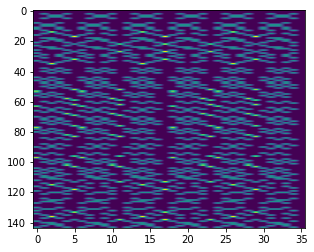

In [16]:
from matplotlib import pyplot as plt
plt.imshow(np.abs(Mat),aspect=.2)

In [17]:
import numpy as np
from numpy.linalg import svd

def nullspace(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns
null_vals = nullspace(Mat)
null_mats = []

for i in range(len(null_vals[0,:])):
    sum_mat = np.zeros([dim,dim],dtype=complex)
    for j,paulis in enumerate(basis):
        sum_mat += null_vals[j,i]*basis[j]
    null_mats.append(sum_mat)

In [18]:
coeff_sum = np.sum(np.abs(null_vals)**2,axis=0)
coeff_sum
# index = 0
# for i in range(36):
#     for j in range(36):
#         if i!=j:
#             if (null_vals[i,index]*null_vals[j,index]!=0):
#                 print(null_vals[i,index]*null_vals[j,index])

array([1., 1., 1.])

In [19]:
np.abs(np.round(np.transpose(np.conj(null_mats[2]))@null_mats[2],5))

array([[1.     , 0.08061, 0.2952 , 0.2952 , 0.2952 , 0.2952 ],
       [0.08061, 1.     , 0.2952 , 0.2952 , 0.2952 , 0.2952 ],
       [0.2952 , 0.2952 , 1.     , 0.08061, 0.2952 , 0.2952 ],
       [0.2952 , 0.2952 , 0.08061, 1.     , 0.2952 , 0.2952 ],
       [0.2952 , 0.2952 , 0.2952 , 0.2952 , 1.     , 0.08061],
       [0.2952 , 0.2952 , 0.2952 , 0.2952 , 0.08061, 1.     ]])

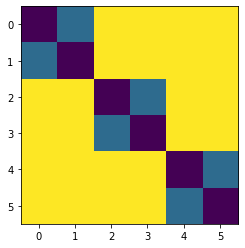

In [20]:
plt.imshow(np.abs(null_mats[1])**2)
#print(np.round(commutator(np.transpose(np.conj(null_mats[2])),null_mats[1]),4))
for null_mat in null_mats:
    for gate in s:
        assert(np.isclose(commutator(gate,null_mat),np.zeros([dim,dim])).all())

These matricies are not unitary so we need to determine what unitaries can be constructed from the linear combination of them. To do this we will solve the eqaution $$(\alpha M_1+\beta M_2)^\dagger(\alpha M_1+\beta M_2) = I$$ we can do this by multiplying out the LHS $$|\alpha|^2M_1^\dagger M_1+|\beta|^2M_2^\dagger M_2+\alpha^*\beta M_1^\dagger M_2 + \alpha\beta^* M_2^\dagger M_1 = I$$ We note that $\left[M_1,M_2\right] = 0$ by construction.

In [104]:
U_1 = null_mats[0]/(np.trace(np.conj(null_mats[0].T)@null_mats[0]))*dim
U_2 = null_mats[1] - np.trace(np.conj(U_1.T)@null_mats[1])*U_1
U_2 /= np.trace(np.conj(U_2.T)@U_2)/dim
U_3 = null_mats[2] - np.trace(np.conj(U_1.T)@null_mats[2])*U_1 - np.trace(np.conj(U_2.T)@null_mats[2])*U_2
U_3 /= np.trace(np.conj(U_3.T)@U_3)/dim

In [106]:
np.round(np.conj(U_2.T)@U_2,4)

array([[ 1.    +0.j,  0.9194-0.j,  0.2048-0.j,  0.2048-0.j, -0.2048+0.j,
        -0.2048-0.j],
       [ 0.9194+0.j,  1.    +0.j,  0.2048-0.j,  0.2048-0.j, -0.2048+0.j,
        -0.2048-0.j],
       [ 0.2048+0.j,  0.2048+0.j,  1.    +0.j,  0.9194+0.j, -0.2048+0.j,
        -0.2048-0.j],
       [ 0.2048+0.j,  0.2048+0.j,  0.9194-0.j,  1.    +0.j, -0.2048+0.j,
        -0.2048-0.j],
       [-0.2048-0.j, -0.2048-0.j, -0.2048-0.j, -0.2048-0.j,  1.    +0.j,
         0.9194+0.j],
       [-0.2048+0.j, -0.2048+0.j, -0.2048+0.j, -0.2048+0.j,  0.9194-0.j,
         1.    +0.j]])

In [31]:
basis_com = [np.transpose(np.conj(mat_1))@mat_2 for mat_1 in null_mats for mat_2 in null_mats]
Mat_com = np.zeros([dim**2,len(basis_com)],dtype=complex)
for column in range(len(basis_com)):
    Mat_com[:,column] = vec(basis_com[column])
null_vals_com = nullspace(Mat_com)
null_mats_com = []
gamma_sq = null_vals_com[0]+1
alpha_sq = null_vals_com[4]
beta_sq = null_vals_com[8]
normed_vals = null_vals_com/(np.sqrt(beta_sq*alpha_sq*gamma_sq))
# for i in range(len(null_vals_com[0,:])):
#     sum_mat = np.zeros([dim,dim],dtype=complex)
#     for j,paulis in enumerate(basis_com):
#         sum_mat += null_vals_com[j,i]*basis_com[j]
#     null_mats_com.append(sum_mat)

In [32]:
gamma_sq

array([1.15373952+0.j, 0.96217564+0.j, 1.03833424+0.j, 0.68847695+0.j,
       0.31867879+0.j, 0.8472588 +0.j])